### **Warehousing Monitoring and Alerting System**

Team B21-CAP0345

Accident category :
1. Carton Accident - Workers hit by cartons
2. Fire Accident - There are fire in the warehouse
3. Forklift Accident - Worker has a forklift accident

**Load Dataset**

Before run this code upload 
DatasetTrain.zip (https://github.com/Rizqillah/VisRound/blob/main/datasets/DatasetTrain.zip) 
and DatasetTest.zip (https://github.com/Rizqillah/VisRound/blob/main/datasets/DatasetTest.zip) 
to directory

In [2]:
import os
import zipfile

local_zip = '/tmp/DatasetTrain.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

local_zip = '/tmp/DatasetTest.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

Let's define each of these directories:

In [3]:
# Directory with our training Carton pictures
train_Carton_dir = os.path.join('/tmp/DatasetTrain/Carton')

# Directory with our training Fire pictures
train_Fire_dir = os.path.join('/tmp/DatasetTrain/Fire')

# Directory with our training Forklift pictures
train_Forklift_dir = os.path.join('/tmp/DatasetTrain/Forklift')

Now, let's see what the filenames look like in `Carton`, `Fire`, and `Forklift` training directories:

In [4]:
train_Carton_names = os.listdir(train_Carton_dir)
print(train_Carton_names[:10])

train_Fire_names = os.listdir(train_Fire_dir)
print(train_Fire_names[:10])

train_Forklift_names = os.listdir(train_Forklift_dir)
print(train_Forklift_names[:10])

['Carton_D (4).jpg', 'Carton_E (5).jpg', 'Carton_C (1).jpg', 'Carton_B (3).jpg', 'Carton_D (3).jpg', 'Carton_B (5).jpg', 'Carton_E (1).jpg', 'Carton_B (1).jpg', 'Carton_E (2).jpg', 'Carton_B (4).jpg']
['Fire_A (3).jpg', 'Fire_A (5).jpg', 'Fire_C (3).jpg', 'Fire_C (5).jpg', 'Fire_D (5).jpg', 'Fire_D (3).jpg', 'Fire_A (2).jpg', 'Fire_D (2).jpg', 'Fire_B (5).jpg', 'Fire_E (4).jpg']
['Forklift_B (5).jpg', 'Forklift_C (4).jpg', 'Forklift_D (4).jpg', 'Forklift_D (1).jpg', 'Forklift_E (2).jpg', 'Forklift_A (2).jpg', 'Forklift_E (1).jpg', 'Forklift_A (4).jpg', 'Forklift_B (4).jpg', 'Forklift_B (3).jpg']


Let's find out the total number of horse and human images in the directories:

In [5]:
print('total training Carton images:', len(os.listdir(train_Carton_dir)))
print('total training Fire images:', len(os.listdir(train_Fire_dir)))
print('total training Forklift images:', len(os.listdir(train_Forklift_dir)))

total training Carton images: 25
total training Fire images: 25
total training Forklift images: 25


Now let's take a look at a few pictures to get a better sense of what they look like:

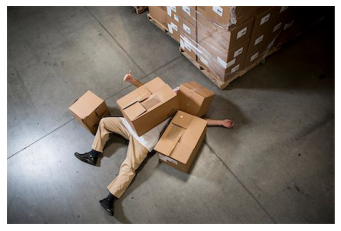

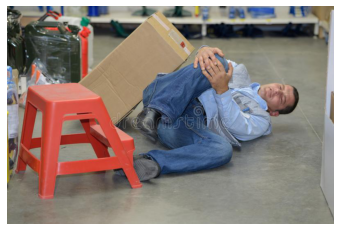

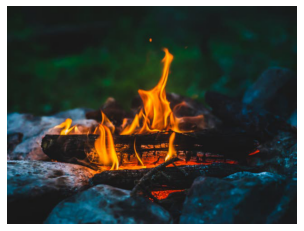

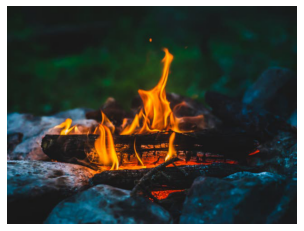

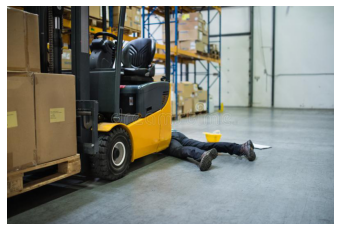

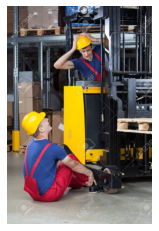

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_Carton = [os.path.join(train_Carton_dir, fname) 
                for fname in train_Carton_names[pic_index-2:pic_index]]
next_Fire = [os.path.join(train_Fire_dir, fname) 
                for fname in train_Fire_names[pic_index-2:pic_index]]
next_Forklift = [os.path.join(train_Forklift_dir, fname) 
                for fname in train_Forklift_names[pic_index-2:pic_index]]

for i, img_path in enumerate(next_Carton+next_Fire+next_Forklift):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

**Building a Small Model from Scratch**

In [14]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "/tmp/DatasetTrain/"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "/tmp/DatasetTest/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=15
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=15
)

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])


model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(train_generator, epochs=15, steps_per_epoch=5, validation_data = validation_generator, verbose = 1, validation_steps=5)

model.save("rps.h5")

Found 75 images belonging to 3 classes.
Found 75 images belonging to 3 classes.
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 17, 17, 128)       0         
________________________________________

Plot Training and validation accuracy

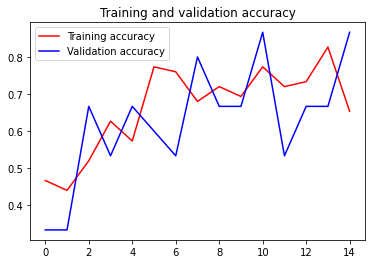

<Figure size 432x288 with 0 Axes>

In [15]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

**Running the Model**

Let's now take a look at actually running a prediction using the model. This code will allow you to choose 1 or more files from your file system, it will then upload them, and run them through the model, giving an indication of whether the object is carton, fire or forklift accident.

In [16]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=5)
  print(fn)
  print(classes)
  # Classes Carton = [ 1. 0. 0.]
  # Classes Fire = [0. 1. 0.]
  # Classes Forklift = [0. 0. 1.]

Saving Fire (16).jpg to Fire (16).jpg
Fire (16).jpg
[[0. 1. 0.]]


**Saving and Convert Model**

In [17]:
import pathlib

# Export the SavedModel
export_dir = 'saved_model/l'
tf.saved_model.save(model,export_dir)

# Convert The model
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

# Save the model
tflite_model_file = pathlib.Path('/content/model.tflite')
tflite_model_file.write_bytes(tflite_model)

# Download the Model
files.download(tflite_model_file)


FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be deprecated soon, so please move the metadata to a different file.
INFO:tensorflow:Assets written to: saved_model/l/assets


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>